# Test 6.0

## Theory Question

Que 1-> How does ResNet solve the problem of network degradation?

Que 2-> What does "freezing the layer" mean in the context of transfer learning?

In [ ]:
Ans 1 ResNet to solve the network degradation problem introduced a residual block in which it had the feature
      to skip connection. In this block we have our input go through not only the weights layer but it also
      skips all the layers so the final output becomes f(x)+x, x is the input and f(x) is from the weights
      layer. So while updating the weights if they are very high or very low, we use the skip connection.

In [ ]:
Ans 2 Freezing the layer in transfer learning means keeping the values of kernel filters same for some of
      the layers so only some of the layers while updating the weights are updated and this reduces the total
      number of parameters in the model and solves the limitation problem.

## Practicle Question

- Load the chess dataset
    

# Step by Step instruction

#### Step 1: Load and Prepare the Dataset using ImageDataGenerator

    Task:
        - Load the Chessman Image Dataset from the specified directory using ImageDataGenerator. Specify the path to the dataset directory.
        - Create instances of ImageDataGenerator for training and validation, including data augmentation techniques.

        -  Generate batches of augmented image data for training and validation
            train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Traning'
                )

            validation_generator = valid_datagen.flow_from_directory(
                valid_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Validation'
                )
        
#### Step 2: Define the Alexnet Architecture

    Task:
        - Construct a basic Alexnet architecture for image classification.Start with an input layer suitable for your dataset dimensions.(use 32  kernel filters only on each layer)
        - Stack convolutional layers (Conv2D) followed by pooling layers (MaxPooling2D).
        - Add fully connected layers (Dense) at the end with appropriate activation functions.

#### Step 3: Compile the Model

    Task:
        - Compile the ALexnet model for training.
        - Choose an appropriate optimizer (e.g., Adam).
        - Specify a loss function (e.g., categorical crossentropy) suitable for multi-class classification.
        - Add metrics to monitor during training (e.g., accuracy).

#### Step 4: Train the Model

    Task:
        - Train the Alexnet model using the training data prepared with ImageDataGenerator.
        - Fit the model using model.fit method, passing the training generator.
        - Specify number of epochs and batch size based on computational resources and dataset size.

#### Step 5: Evaluate the Model

    Task:
        - Evaluate the trained model on the validation data.
        - Use model.evaluate to calculate the model's performance metrics on unseen data.
        - Analyze metrics such as accuracy to assess model performance.

#### Step 6: Plot Training and Testing Loss
#### Step 7: Save the model in .h5 extension
#### Step 8: Load the model
#### Step 9: Test the model
    

In [60]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from zipfile import ZipFile
from keras import utils
import matplotlib.pyplot as mpl
import keras

In [4]:
file_name = "Chessman.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall('Chess')
  print("Done")
zip.close()

Done


In [18]:
directory="Chess"

In [19]:
Im_size=227
batch_size=128
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,zoom_range=0.2,
                                                                horizontal_flip=True,validation_split=0.1)

valid_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.1 )


In [21]:
train_generator = train_datagen.flow_from_directory(
            directory,
            target_size=(227, 227),  # Adjust according to your model's input shape
            batch_size=32,
            class_mode='categorical',
            subset='training'
            )

validation_generator = valid_datagen.flow_from_directory(
            directory,
            target_size=(227, 227),  # Adjust according to your model's input shape
            batch_size=32,
            class_mode='categorical',
            subset='validation'
            )

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [30]:
train_generator

In [75]:
alex=Sequential()
alex.add(Conv2D(filters=32,kernel_size=(11,11),kernel_initializer='he_uniform',strides=(4,4),activation='relu',input_shape=(227,227,3)))
alex.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
alex.add(Conv2D(filters=32,kernel_size=(5,5),kernel_initializer='he_uniform',strides=(1,1),activation='relu',padding='same'))
alex.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
alex.add(Conv2D(filters=32,kernel_size=(3,3),kernel_initializer='he_uniform',strides=(1,1),activation='relu',padding='same'))
alex.add(Conv2D(filters=32,kernel_size=(3,3),kernel_initializer='he_uniform',strides=(1,1),activation='relu',padding='same'))
alex.add(Conv2D(filters=32,kernel_size=(3,3),kernel_initializer='he_uniform',strides=(1,1),activation='relu',padding='same'))
alex.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
alex.add(Flatten())
alex.add(Dense(4096,activation='relu',kernel_initializer='he_uniform'))
alex.add(Dense(4096,activation='relu',kernel_initializer='he_uniform'))
alex.add(Dense(6,activation='softmax'))

In [40]:
alex.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 384)       885120    
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 384)      

In [80]:
alex.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=alex.fit(train_generator,batch_size=32,epochs=2,validation_data=validation_generator,verbose=1)

Epoch 1/2
16/16 [==============================] - 27s 2s/step - loss: 1.7861 - accuracy: 0.2124 - val_loss: 1.7608 - val_accuracy: 0.2115
Epoch 2/2
16/16 [==============================] - 24s 2s/step - loss: 1.7209 - accuracy: 0.2525 - val_loss: 1.6208 - val_accuracy: 0.2500


In [77]:
alex.evaluate(validation_generator)

2/2 [==============================] - 1s 398ms/step - loss: 1.7702 - accuracy: 0.1923


[1.7701750993728638, 0.19230769574642181]

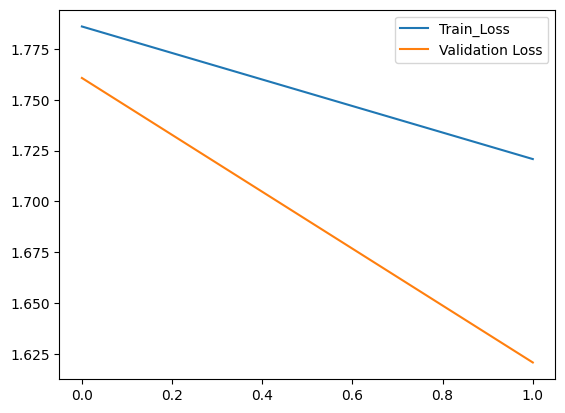

In [81]:
mpl.plot(alex.history.history['loss'],label='Train_Loss')
mpl.plot(alex.history.history['val_loss'],label='Validation Loss')
mpl.legend()

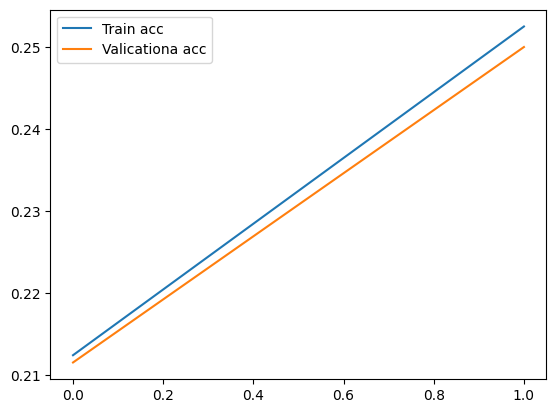

In [82]:
mpl.plot(alex.history.history['accuracy'],label='Train acc')
mpl.plot(alex.history.history['val_accuracy'],label='Valicationa acc')
mpl.legend()

In [83]:
alex.save('chessman.h7')

In [84]:
model=keras.models.load_model('chessman.h7')

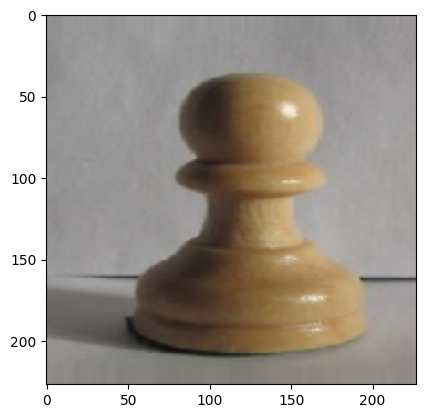

In [85]:
batch_x,batch_y=train_generator[7]
mpl.imshow(batch_x[0])
mpl.show()

In [88]:
x=np.reshape(batch_x[0],(1,227,227,3))
res=np.argmax(model.predict(x))
if res==0:
  print("Pawn")
elif res==1:
  print("Knight")
elif res==2:
  print("Bishop")
elif res==3:
  print("Rook")
elif res==4:
  print("Queen")
elif res==5:
  print("King")

1/1 [==============================] - 0s 35ms/step
Rook


In [ ]:
#AI/ML Trainer - Saurav
#Date 14 June 2024
#Time - 12:20